In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# silence future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# set seaborn aesthetics for plots  
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('muted')

## Part 1: 

## 1. Load dataset and perform exploratory analysis

In [3]:
# load data frame
file_path = '../hour.csv'
cnt_hour = pd.read_csv(file_path, sep=',')

In [4]:
# check dimensions 
cnt_hour.shape

(17379, 17)

In [5]:
# inspect dataset
cnt_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dataset description (from data source page): 
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter) -> not correct, winter is actually n. 4.
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether or not day is holiday
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided by 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided by 50 (max)
- hum: Normalized humidity. The values are divided by 100 (max)
- windspeed: Normalized wind speed. The values are divided by 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [6]:
# drop redundant index
cnt_hour.drop('instant', axis='columns', inplace=True)

In [7]:
# merge date and time info into a datetime index 
# attach hour of day to dteday 
cnt_hour['dteday'] = cnt_hour.dteday + '-' + cnt_hour.hr.map(str)
# rename feature 
cnt_hour.rename(mapper= {'dteday': 'date_time'}, axis='columns', inplace=True)
# convert feature to datetime type  
cnt_hour['date_time'] = pd.to_datetime(cnt_hour['date_time'], format='%Y-%m-%d-%H')
# datetime column is converted to new index 
cnt_hour.set_index('date_time', inplace=True)

In [8]:
# drop redundant features 
cnt_hour.drop(['yr', 'mnth', 'hr'], axis='columns', inplace=True)

In [9]:
# reorder features
cols = ['season', 'weekday', 'holiday'] + [c for c in cnt_hour.columns if c not in ['season', 'holiday', 'weekday']]
cnt_hour = cnt_hour[cols]

In [10]:
cnt_hour.head()

,season,weekday,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
date_time,,,,,,,,,,,,
2011-01-01 00:00:00,1,6,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,1,6,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,1,6,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,1,6,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,1,6,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# check data types 
cnt_hour.dtypes

season          int64
weekday         int64
holiday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [12]:
# convert temperature (ºC), humidity (%), wind speed (km/h) (for plotting)
conv = {'temp': 41, 'atemp': 50, 'hum': 100, 'windspeed': 67}
for col in conv.keys(): 
    cnt_hour[col] *= conv[col]

In [13]:
# define seasons  
seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
# days 
days = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
# day type
day_type = {0: 'No', 1: 'Yes'}
# rename categories (for plotting)
cnt_hour['season'].replace(seasons, inplace=True)
cnt_hour['weekday'].replace(days, inplace=True)
cnt_hour['holiday'].replace(day_type, inplace=True)
cnt_hour['workingday'].replace(day_type, inplace=True)

In [14]:
# convert categorical variables to category data type
cnt_hour['weathersit'] = cnt_hour['weathersit'].astype('category')
cnt_hour['holiday'] = cnt_hour['holiday'].astype('category', categories=day_type.values())
cnt_hour['workingday'] = cnt_hour['workingday'].astype('category', categories=day_type.values())
# preserve order of weekdays, seasons (for plotting)
cnt_hour['weekday'] = cnt_hour['weekday'].astype('category', categories=days.values(), ordered=True)
cnt_hour['season'] = cnt_hour['season'].astype('category', categories=seasons.values(), ordered=True)

In [15]:
cnt_hour.round(decimals=1).head()

,season,weekday,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
date_time,,,,,,,,,,,,
2011-01-01 00:00:00,Winter,Sat,No,No,1,9.8,14.4,81.0,0.0,3,13,16
2011-01-01 01:00:00,Winter,Sat,No,No,1,9.0,13.6,80.0,0.0,8,32,40
2011-01-01 02:00:00,Winter,Sat,No,No,1,9.0,13.6,80.0,0.0,5,27,32
2011-01-01 03:00:00,Winter,Sat,No,No,1,9.8,14.4,75.0,0.0,3,10,13
2011-01-01 04:00:00,Winter,Sat,No,No,1,9.8,14.4,75.0,0.0,0,1,1


In [16]:
# check data types 
cnt_hour.dtypes

season        category
weekday       category
holiday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

### • Approach to Data Exploration. 
I will first visualize the counts variation over time and the distribution of counts according to the time categories of the dataset (hours, days, weeks). <br>
Next, I will focus on analyzing the variations of counts relative to the weather variables. 

### • Time Periods of the Bike Counts. 

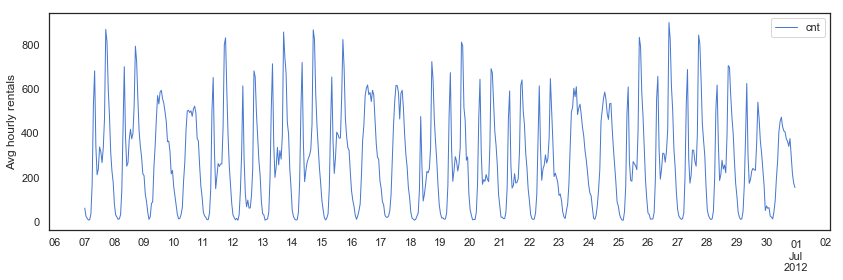

In [17]:
# zoom-in to display daily and weekly seasonality
ax = cnt_hour.loc['2012-06-07':'2012-06-30', 'cnt'].plot(kind='line', style='-', 
                                                         figsize= (14, 4), lw=1, 
                                                         legend=True) 
ax = ax.set(xlabel='', ylabel='Avg hourly rentals')

The data appears to be strongly seasonal with multiple periods, as showed by the plot above (hourly, daily and weekly periods). At the year level, the series can be plotted after resampling the data on a daily and weekly basis. 

In [18]:
# resample data over days and weeks 
dy = cnt_hour[['cnt', 'casual', 'registered']].resample('D')
wk = cnt_hour[['cnt', 'casual', 'registered']].resample('W')
yy = cnt_hour[['cnt', 'casual', 'registered']].resample('Y')
# calculate mean, std over day 
dy_agg = dy.agg(['mean', 'std'])
dy_agg.index.name = 'day'
# calculate mean, std over week 
wk_agg = wk.agg(['mean', 'std'])
wk_agg.index.name = 'week'

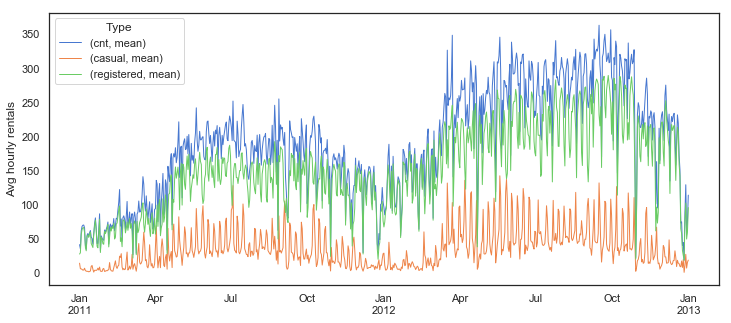

In [19]:
# plot: rentals, daily avg 
data = dy_agg.loc[:, [('cnt', 'mean'), ('casual', 'mean'), ('registered', 'mean')]]
ax = data.plot(kind='line', style='-', figsize= (12, 5), linewidth=1) 
ax = ax.set(xlabel='', ylabel='Avg hourly rentals')
ax = plt.legend(title= 'Type')

There's a clear oscillatory pattern due to seasons (and weeks, for the casual users), and a positive (increasing) trend over the two-year timespan for the counts of both the registered and the casual users. <br>
The large standard errors reflect the dispersion of hourly counts. 

In [20]:
# large variations within days
dy_agg.round(decimals=1).head()

cnt       casual       registered      
            mean   std   mean   std       mean   std
day                                                 
2011-01-01  41.0  34.3   13.8  14.5       27.2  21.3
2011-01-02  34.8  29.8    5.7   6.3       29.1  24.6
2011-01-03  61.3  48.8    5.5   5.0       55.9  46.4
2011-01-04  67.9  59.9    4.7   5.9       63.2  58.2
2011-01-05  69.6  58.4    3.6   3.4       66.0  57.4

A better picture of the positive trend is given by the counts resampled by week and plotted vs. weeks. 

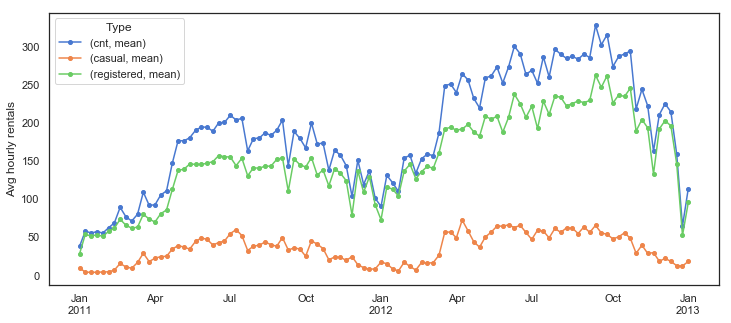

In [21]:
# plot: rentals, weekly avg 
data = wk_agg.loc[:, [('cnt', 'mean'), ('casual', 'mean'), ('registered', 'mean')]]
ax = data.plot(kind='line', style='-o', figsize= (12, 5), ms=4) 
ax = ax.set(xlabel='', ylabel='Avg hourly rentals')
ax = plt.legend(title='Type')

### • Effect of Seasons. 

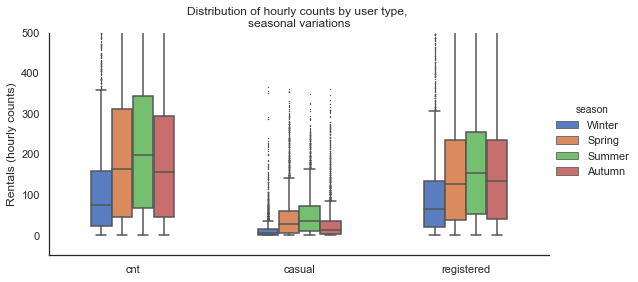

In [22]:
# plot: rental counts by season, type of user
# prepare data 
data = pd.melt(cnt_hour, id_vars='season', value_vars=['cnt', 'casual', 'registered'])
# plot 
ax = sns.catplot(data= data, x='variable', y='value', hue='season', 
                 kind='box', fliersize=0.5, width= 0.5, 
                 legend=True, height=4, aspect=2)
ax = ax.set(ylim=(None, 500), xlabel='', ylabel='Rentals (hourly counts)', 
            title='Distribution of hourly counts by user type, \nseasonal variations')
sns.despine()

The effect of seasons can be appreciated in the boxplots above and is summarized in the table below: <br>
* The average counts are minimum for winter and maximum for summer, regardless of the type of users. 
* Inter-seasonal means for the total counts are similar except for the winter season for which mean counts are significantly lower. 

In [23]:
# statistics on users by seasons: group by year, season
by_sn = (cnt_hour.loc[:, ['season', 'casual', 'registered', 'cnt']]
         .groupby('season')
         .agg(['mean', 'std']))
by_sn.index = seasons.values()
by_sn.round(decimals=1)

casual       registered           cnt       
         mean   std       mean    std   mean    std
Winter   14.3  27.5       96.8  104.3  111.1  119.2
Spring   46.2  57.5      162.2  152.8  208.3  188.4
Summer   50.3  51.8      185.7  166.4  236.0  197.7
Autumn   30.7  46.0      168.2  157.6  198.9  183.0

### • Counts Grouped by Day of Week.  

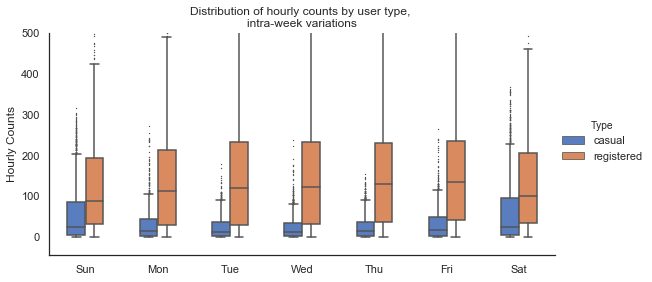

In [24]:
# plot: intra-week distribution of counts 
# prepare data 
data = pd.melt(cnt_hour, id_vars=['weekday', 'workingday'], value_vars=['casual', 'registered'])
data.rename({'variable': 'Type', 'value': 'Hourly Counts'}, axis='columns', inplace=True)
# plot
ax = sns.catplot(x='weekday', y='Hourly Counts', hue='Type', 
                 data=data, kind='box', fliersize= 0.5, width=0.5, 
                 height=4, aspect=2)
ax = ax.set(ylim=(None, 500), xlabel='', 
            title='Distribution of hourly counts by user type, \nintra-week variations')

Bike count distributions for casual and registered users are different depending on the particular weekday: <br>
* Rentals by casual users increase during the weekend. 
* Rentals by registered users are higher during working days.

In [25]:
# statistics on users by day of week 
data.groupby(['weekday', 'Type']).agg(['mean', 'std']).unstack(level=1).round(decimals=1)

Hourly Counts                             
                 mean               std           
Type           casual registered casual registered
weekday                                           
Sun              56.2      121.3   68.1      106.0
Mon              28.6      155.2   35.1      159.5
Tue              23.6      167.7   26.2      170.1
Wed              23.2      168.0   27.8      172.3
Thu              24.9      171.6   27.8      169.3
Fri              31.5      164.7   36.5      149.9
Sat              61.2      129.0   77.0      108.6

### • Within-day Variations. 

Mean bike counts show a strong modulation as a function of day hours. Casual and registered users' counts have very different patterns across the day: casual users move frequently during the central hours of the day, whereas registered users are more active during rush hours, early morning and late afternoon. This information and the intra-week patterns suggest that registered users are likely to use the bike service to commute to the workplace. 

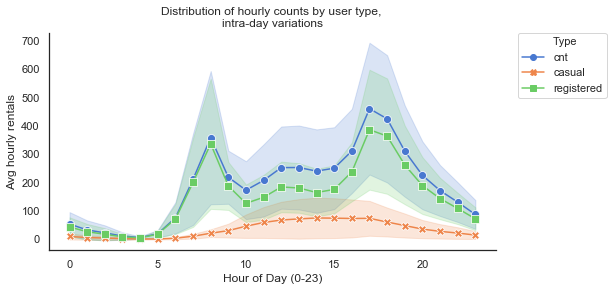

In [26]:
# prepare dataframe for plotting
data = cnt_hour.loc[:, ['casual', 'registered', 'cnt']]
data['Hour of Day (0-23)'] = data.index.hour
data = pd.melt(data, id_vars='Hour of Day (0-23)', value_vars=['cnt', 'casual', 'registered'])
data.rename({'variable': 'Type'}, axis='columns', inplace=True)

# plot: intra-day avg rentals, by user type 
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
plt.subplot(111)
ax = sns.lineplot(data=data, x='Hour of Day (0-23)', y='value', hue='Type', style='Type', 
                  markers=True, dashes=False, ci='sd', markersize=8)
ax = ax.set(ylabel='Avg hourly rentals', title='Distribution of hourly counts by user type, \nintra-day variations')
ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

In [27]:
# split dataset into nighttime and daytime counts 
data_night = cnt_hour.between_time('21:00', '05:00')[['casual', 'registered']]
data_day = cnt_hour.between_time('06:00', '20:00')[['casual', 'registered']]
# prepare dataframes for plotting
data_night = pd.melt(data_night, value_vars=['casual', 'registered'])
data_day = pd.melt(data_day, value_vars=['casual', 'registered'])
# counts data for histograms
hist_casual_night = data_night[data_night.variable=='casual'].value
hist_registered_night = data_night[data_night.variable=='registered'].value
hist_casual_day = data_day[data_day.variable=='casual'].value
hist_registered_day = data_day[data_day.variable=='registered'].value

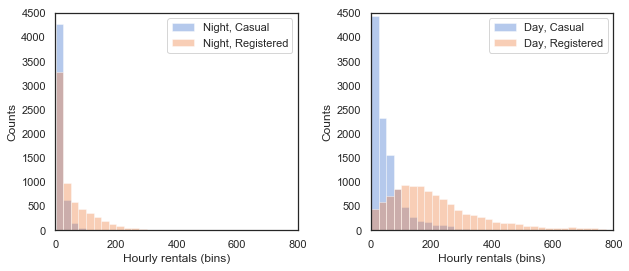

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.3)

# plot parameters: bins, ranges for x and y axis 
bins = range(1, 800, 25)
xlims= (0, 800)
ylims= (0, 4500)

# plot: nighttime counts distribution, by user type 
plt.subplot(121)
# casual users 
axes[0] = sns.distplot(hist_casual_night, bins=bins, kde=False, label='Night, Casual')
# registered users 
axes[0] = sns.distplot(hist_registered_night, bins=bins, kde=False, label='Night, Registered')
axes[0].legend()
axes[0] = axes[0].set(ylim=ylims, xlim=xlims, xlabel='Hourly rentals (bins)', ylabel='Counts')

# plot: daytime counts distribution, by user type 
plt.subplot(122)
# casual users 
axes[1] = sns.distplot(hist_casual_day, bins=bins, kde=False, label='Day, Casual')
# registered users 
axes[1] = sns.distplot(hist_registered_day, bins=bins, kde=False, label='Day, Registered')
axes[1].legend()
axes[1] = axes[1].set(ylim=ylims, xlim=xlims, xlabel='Hourly rentals (bins)', ylabel='Counts')

Splitting the dataset into night and day rides reveals another interesting insight in the distribution of bike counts. In the night hours, casual and registered users distributions look very similar with most counts being smaller than 25 units per hour. Conversely, registered users counts increase significantly during daytime: most counts have between 100 and 200 registered users. 

### • Dependence of Counts on Weather Data

In [29]:
# helper function: discretize x and plot mean(y)
def discretize_and_plot(x, y, col, data, hue=None, x_bins=None, x_estimator=np.mean, ylim=(0, None)): 
    '''Plot mean(y) as a function of x, 
       a continuous variable which is discretized using x_bins bins'''
    ax = sns.lmplot(x=x, x_bins=x_bins, y=y, hue=hue, col=col, data=data, 
                    x_estimator=x_estimator, truncate=True, fit_reg=False, 
                    scatter_kws={'alpha': 0.75}, ci=None, height=3, aspect=1)
    ax.set(ylim=ylim)
    return 

#### • Temperature. 

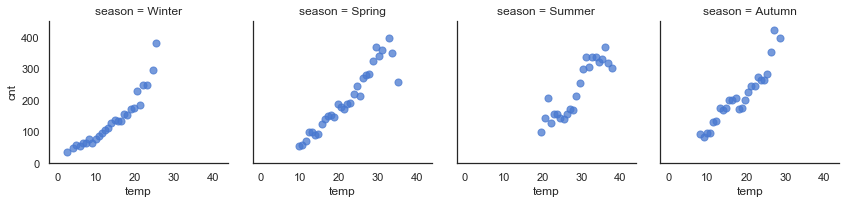

In [30]:
# avg counts as a function of temperature (binned), grouped by season
discretize_and_plot(x='temp', y='cnt', col='season', data=cnt_hour, x_bins=100)

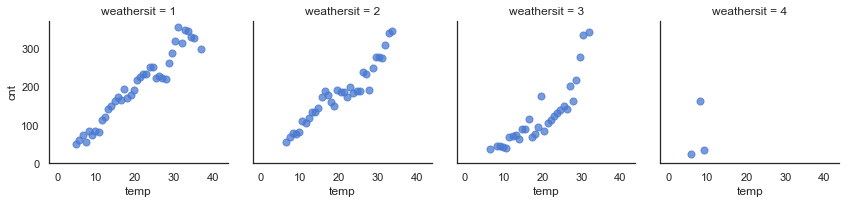

In [31]:
# avg counts as a function of temperature (binned), grouped by weather condition
discretize_and_plot(x='temp', y='cnt', col='weathersit', data=cnt_hour, x_bins=100)

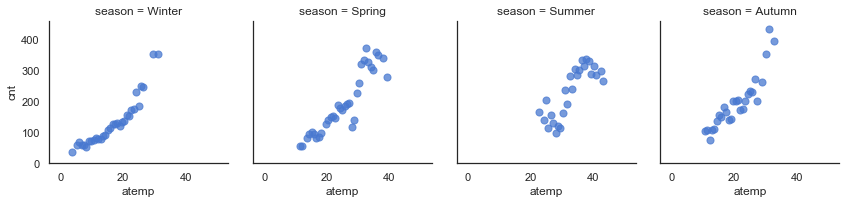

In [32]:
# avg counts as a function of temperature (binned), grouped by weather condition
discretize_and_plot(x='atemp', y='cnt', col='season', data=cnt_hour, x_bins=100)

* Temperature and feeling temperature are positively correlated with mean bike counts. <br>
The correlation coefficient between the two features can be calculated, and confirms the trends displayed by the plots. 

In [33]:
cnt_hour[['temp', 'cnt']].corr()

,temp,cnt
temp,1.000000,0.404772
cnt,0.404772,1.000000


#### • Wind Speed. 

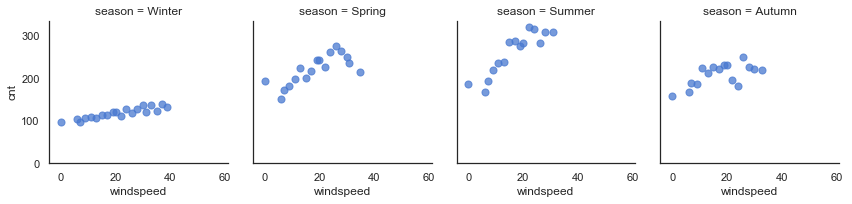

In [34]:
# avg counts as a function of wind speeed (binned), grouped by season
discretize_and_plot(x='windspeed', y='cnt', col='season', data=cnt_hour, x_bins=100)

* Wind speed looks positively correlated with mean bike counts. Correlation strength is season-dependent. 

In [35]:
cnt_hour[['windspeed', 'cnt']].corr()

,windspeed,cnt
windspeed,1.000000,0.093234
cnt,0.093234,1.000000


#### • Relative Humidity.

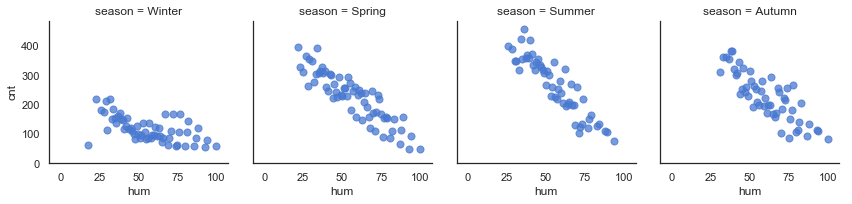

In [36]:
# avg counts as a function of relative humidity (binned), grouped by season
discretize_and_plot(x='hum', y='cnt', col='season', data=cnt_hour, x_bins=100)

* Relative humidity is negatively correlated with mean bike counts, and shows some dependence on the season. 

In [37]:
cnt_hour[['hum', 'cnt']].corr()

,hum,cnt
hum,1.000000,-0.322911
cnt,-0.322911,1.000000


####  • Temperature vs. Feeling Temperature 

Temperature and feeling temperature are highly correlated predictors. 

In [38]:
cnt_hour[['temp', 'atemp']].corr()

,temp,atemp
temp,1.000000,0.987672
atemp,0.987672,1.000000


I replace the feeling temperature with the difference between it and the actual temperature as I will be using a linear model to predict the bike counts. 

In [39]:
# find difference between real and feeling temperature
temp_diff = cnt_hour['temp'] - cnt_hour['atemp']
cnt_hour.insert(loc=7, column='temp_diff', value=temp_diff)
cnt_hour.head()

,season,weekday,holiday,workingday,weathersit,temp,atemp,temp_diff,hum,windspeed,casual,registered,cnt
date_time,,,,,,,,,,,,,
2011-01-01 00:00:00,Winter,Sat,No,No,1,9.84,14.395,-4.555,81.0,0.0,3,13,16
2011-01-01 01:00:00,Winter,Sat,No,No,1,9.02,13.635,-4.615,80.0,0.0,8,32,40
2011-01-01 02:00:00,Winter,Sat,No,No,1,9.02,13.635,-4.615,80.0,0.0,5,27,32
2011-01-01 03:00:00,Winter,Sat,No,No,1,9.84,14.395,-4.555,75.0,0.0,3,10,13
2011-01-01 04:00:00,Winter,Sat,No,No,1,9.84,14.395,-4.555,75.0,0.0,0,1,1


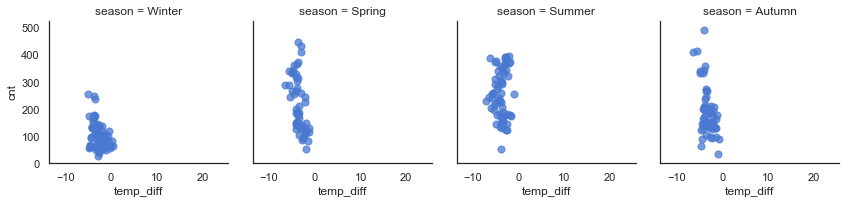

In [40]:
# avg counts as a function of temperature differences, by season 
discretize_and_plot(x='temp_diff', y='cnt', col='season', data=cnt_hour, x_bins=100)

The difference between the two temperature may store some correlation with the counts useful for the predictive model. 

In [41]:
cnt_hour[['temp_diff', 'cnt']].corr()

,temp_diff,cnt
temp_diff,1.000000,-0.169716
cnt,-0.169716,1.000000


#### • Weather Conditions

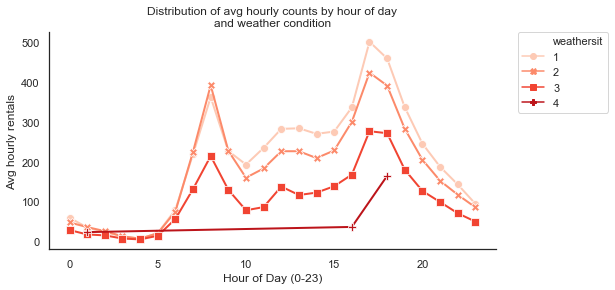

In [42]:
# plot: distribution of mean counts by hour of day, grouped by weather condition 
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
palette = sns.color_palette('Reds', n_colors=4)

plt.subplot(111)
ax = sns.lineplot(x=cnt_hour.index.hour, y='cnt', hue='weathersit', data=cnt_hour, 
                  markers=True, dashes=False, style='weathersit', ms=8, linewidth=2, 
                  palette=palette, estimator=np.mean, ci=None)
ax.set(xlabel='Hour of Day (0-23)', ylabel='Avg hourly rentals', 
       title='Distribution of avg hourly counts by hour of day\nand weather condition')
ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

* Finally, mean bike counts over a day show a consistent decrease as the weather gets less friendly to riders. 

## 2. Build Predictive Model of Bike Counts.

### Selected Model: Linear Regression with Lasso Regularization

For the predictive modeling part, I chose a linear regression with Lasso regularization. <br>
1. The relationships between the numeric variables (weather) and mean counts look approximately linear. 
2. This model is particularly suitable for a business case because of its simplicity and interpretability. I believe model interpretability, i.e. the ability of singling out the most important predictors linked to the response variable and to fully understand the prediction process of the model, is very relevant when making a case for business decisions. 
3. Note: I have omitted interaction terms from the model for the sake of simplicity. They should be considered however to improve the accuracy. For example, it is likely that wind speed and temperature may contribute to counts in a correlated manner. 

[Note 1: the counts distribution is not gaussian at all; additionally, counts can't be negative and time dependence of the response variable is periodic. This indicates that other models should be preferred over linear regression to get more accurate predictions, e.g. tree-based models or even Poisson models (negative binomial distribution may be interesting to test)]. <br>  

[Note 2: I had also considered a tree-based model like Random Forest which would address nonlinearity and lead to more accurate predictions, but it took forever to optimize it via a hyperparameter grid search with my laptop].

In [43]:
cnt_hour.head()

,season,weekday,holiday,workingday,weathersit,temp,atemp,temp_diff,hum,windspeed,casual,registered,cnt
date_time,,,,,,,,,,,,,
2011-01-01 00:00:00,Winter,Sat,No,No,1,9.84,14.395,-4.555,81.0,0.0,3,13,16
2011-01-01 01:00:00,Winter,Sat,No,No,1,9.02,13.635,-4.615,80.0,0.0,8,32,40
2011-01-01 02:00:00,Winter,Sat,No,No,1,9.02,13.635,-4.615,80.0,0.0,5,27,32
2011-01-01 03:00:00,Winter,Sat,No,No,1,9.84,14.395,-4.555,75.0,0.0,3,10,13
2011-01-01 04:00:00,Winter,Sat,No,No,1,9.84,14.395,-4.555,75.0,0.0,0,1,1


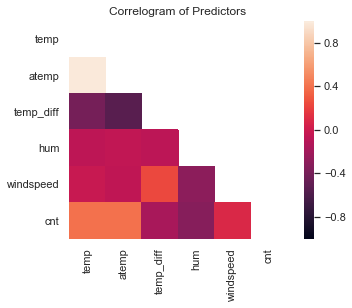

In [44]:
# check for collinear predictors 
corr = cnt_hour[[col for col in cnt_hour.columns if col not in ['casual', 'registered']]].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask, square=True, vmax=1.0, vmin=-1.0)
ax = ax.set(title='Correlogram of Predictors')

Collinear predictors temperature and feeling temperature are replaced with their difference. Other predictors do not exhibit high level of collinearity. 

In [45]:
# remove collinear predictors
ts_cnt = cnt_hour.drop(['atemp', 'casual', 'registered'], axis='columns')
# add back year, month, day, hour of day 
ts_cnt.insert(loc=0, column='hourofday', value=ts_cnt.index.hour.astype('category'))
ts_cnt.insert(loc=0, column='dayofyear', value=ts_cnt.index.day.astype('category'))
ts_cnt.insert(loc=0, column='month', value=ts_cnt.index.month.astype('category'))
ts_cnt.insert(loc=0, column='year', value=ts_cnt.index.year.astype('category'))
# check dataset
ts_cnt.round(decimals=1).head()

,year,month,dayofyear,hourofday,season,weekday,holiday,workingday,weathersit,temp,temp_diff,hum,windspeed,cnt
date_time,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011,1,1,0,Winter,Sat,No,No,1,9.8,-4.6,81.0,0.0,16
2011-01-01 01:00:00,2011,1,1,1,Winter,Sat,No,No,1,9.0,-4.6,80.0,0.0,40
2011-01-01 02:00:00,2011,1,1,2,Winter,Sat,No,No,1,9.0,-4.6,80.0,0.0,32
2011-01-01 03:00:00,2011,1,1,3,Winter,Sat,No,No,1,9.8,-4.6,75.0,0.0,13
2011-01-01 04:00:00,2011,1,1,4,Winter,Sat,No,No,1,9.8,-4.6,75.0,0.0,1


Time indicators are added back to the dataset; they are treated as categorical predictors. 

In [46]:
# load modules: model validation
from sklearn.model_selection import train_test_split
# performance metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score as rsquared
# model: Lasso-regularized linear regression 
from sklearn.linear_model import LassoCV
# transform response 
from sklearn.compose import TransformedTargetRegressor
# shuffle data on cross-validation
from sklearn.model_selection import ShuffleSplit

In [47]:
# split categorical and numeric predictors
cats = ts_cnt.columns[1:-5]
# dummify categorical predictors
X_cat = pd.get_dummies(ts_cnt[cats], drop_first=True, dtype=int)
# numeric variables 
nums = [col for col in ts_cnt.columns if col not in cats and col not in 'cnt']
X_num = ts_cnt[nums]

In [48]:
# define predictor dataframe
X = pd.concat([X_cat, X_num], axis='columns')
# check output
X.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,...,holiday_Yes,workingday_Yes,weathersit_2,weathersit_3,weathersit_4,year,temp,temp_diff,hum,windspeed
date_time,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2011,9.84,-4.555,81.0,0.0
2011-01-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2011,9.02,-4.615,80.0,0.0
2011-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2011,9.02,-4.615,80.0,0.0
2011-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2011,9.84,-4.555,75.0,0.0
2011-01-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2011,9.84,-4.555,75.0,0.0


In [49]:
# define response variable
y = ts_cnt['cnt']

In [50]:
print(X.shape, y.shape)

(17379, 83) (17379,)


* Categorical features have been encoded using one-hot encoding. 
* A holdout sample (20% of data) is withdraw from the dataset to test the predictive accuracy of the model on unseen data. 
* Feature scaling: will be performed by the Lasso regressor (features are scaled to zero mean). 
* Target variable is log-transformed to make its distribution closer to gaussian: y -> log(y + 1). 

In [51]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)

Train linear regression model using the `LassoCV` implementation and 5-fold cross validation to automatically select the best regularization parameter $\alpha$ for the Lasso (the grid for searching optimal $\alpha$ values is the default one) and the regression coefficients. Cross-validation estimates how well the fitted model generalizes to unseen data. <br>  
Calculate error metrics on test set: 
* R squared (variance explained by the model). 
* Mean squared error. 
* Mean absolute error. 

In [52]:
# ==== Model: Lasso-regularized Linear Regression on transformed response ====
# cv generator: 5-fold CV with data shuffling 
cv_generator = cv_generator = ShuffleSplit(n_splits=5, test_size=0.25, random_state=1234)
regr = LassoCV(fit_intercept=True, normalize=True, cv=5, random_state=1234)
# transform target
model_lasso = TransformedTargetRegressor(regressor=regr, 
                                         func=np.log1p, 
                                         inverse_func=np.expm1)
# fit 
model_lasso.fit(X_train, y_train)
# predict 
y_pred_lasso = model_lasso.predict(X_test)
# get performance metrics 
print('R squared: {:.2f}'.format(rsquared(y_test, y_pred_lasso)))
print('MSE: {:.2f}'.format(mse(y_test, y_pred_lasso)))
print('MAE: {:.2f}'.format(mae(y_test, y_pred_lasso)))

R squared: 0.71
MSE: 9531.63
MAE: 63.33


Quick check of the convergence for each one of the five cross-validation samples (each line represents the choice of a value of the regularization parameter $\alpha$). 

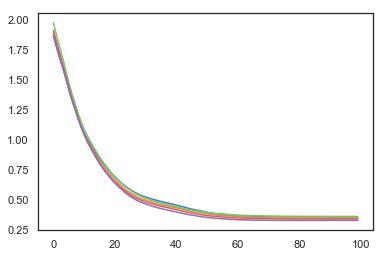

In [53]:
ax = plt.plot(model_lasso.regressor_.mse_path_)

Plot predicted vs. actual bike counts on test set to visually assess the quality of the model. 

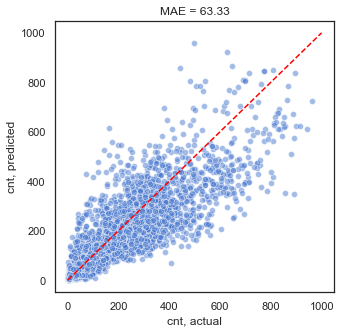

In [54]:
# merge predicted and actual counts into data frame 
data = np.concatenate((y_pred_lasso.reshape(-1,1), y_test.values.reshape(-1, 1)), axis=1)
data = pd.DataFrame(data, columns=['cnt_pred', 'cnt_test'])
mae_value = mae(y_test, y_pred_lasso).round(2)

# plot predicted vs. actual counts
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.subplot(111)
ax = sns.scatterplot(x='cnt_test', y='cnt_pred', data=data, alpha=0.5)
ax = ax.set(xlabel='cnt, actual', ylabel='cnt, predicted', title='MAE = ' + str(mae_value))
# plot diagonal line
x_diag, y_diag = np.arange(1000), np.arange(1000)
ax = plt.plot(x_diag, y_diag, c='r', ls='--')

Lasso regularization allows to get insight into the most important factors at play in the bike counts predictions. The coefficients of the least important predictors shrink to zero when the fit has converged. <br>  
* Hours of day, wheater conditions, holidays, temperature, and year are important predictors of bike counts. 

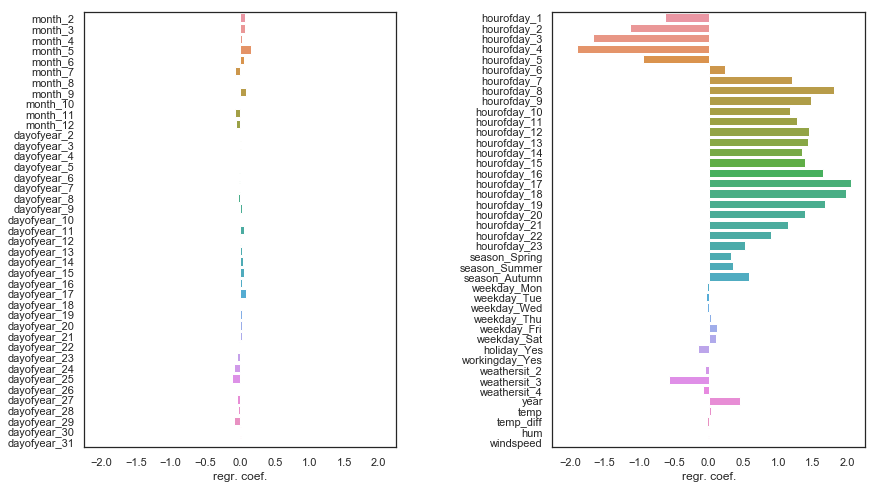

In [55]:
# plot values of linear fit coefficients
var_coefs = pd.DataFrame(model_lasso.regressor_.coef_, index=X_train.columns, columns=['value'])
var_coefs.reset_index(level=0, inplace=True)

fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(14, 8))
plt.subplots_adjust(wspace=0.5)

params = {'index': 41, 
          'xlabel': 'regr. coef.', 
          'ylabel': '', 
          'xlim': (-2.25, 2.25)}

plt.subplot(121)
ax_1 = sns.barplot(data=var_coefs.iloc[:params['index'], :], y='index', x='value')
ax_1 = ax_1.set(xlabel=params['xlabel'], ylabel=params['ylabel'], xlim=params['xlim'])
plt.subplot(122)
ax_2 = sns.barplot(data=var_coefs.iloc[params['index']:, :], y='index', x='value')
ax_2 = ax_2.set(xlabel=params['xlabel'], ylabel=params['ylabel'], xlim=params['xlim'])

Finally, the model can be fit to the whole dataset and saved. 

In [56]:
# last: retrain model using whole dataset 
# fit 
model_lasso.fit(X, y)
# predict 
y_pred_dataset = model_lasso.predict(X)
# get performance metrics on train data 
print('R squared: {:.2f}'.format(rsquared(y, y_pred_dataset)))
print('MSE: {:.2f}'.format(mse(y, y_pred_dataset)))
print('MAE: {:.2f}'.format(mae(y, y_pred_dataset)))

R squared: 0.71
MSE: 9488.66
MAE: 62.88


## Part 2: Model Scaling.

### • Scaling properties of the Lasso model. 

Solving a linear regression model requires finding the coefficients that minimize the loss function under a certain constraint (OLS term + Lasso regularization term). Linear algebra operations involving matrix multiplications are needed; each one bears a computational cost that depends on the number of predictors and observations that make up the dataset.

$$\text{arg}\min_\mathbf{w}{ \quad(\mathbf{y} - \mathbf{X} \cdot \mathbf{w})^{T} (\mathbf{y} - \mathbf{X} \cdot \mathbf{w})  + \alpha \cdot||\mathbf{w}||_{1}}$$

The complexity of these operations is expressed in terms of Big-Oh notation: the asymptotic trend in time or memory as the number of predictors and observations gets bigger. <br>  
* I will make the assumption that the number of predictors for the bike dataset remain constant (no feature engineering, no addition of interaction terms to the model). 
* Under this assumption, the bottleneck of the algorithm is the time complexity brought about by the multiplication of two matrices that store the *N* observations. 

The specific algorithm used by `sklearn` to perform the minimization has time complexity $\mathcal{O}(dN)$ ("coordinate descent", i.e. minimizing with respect to one coordinate at a time) where *d* is the number of predictors. The resulting complexity of our problem is thus of order _N_: $\mathcal{O}(N)$, but the minimization has to be iterated over a grid of $\alpha$ values in order to select the best model. 

### • How distributed computing can ease massive computing tasks. 

We have various levels of complexity in the Lasso regression problem: <br>  
1. Grid search on regularization parameter $\alpha$. 
2. Minimization of the objective function for each different regularization parameter value.   
3. A third level involves the amount of storage required for datasets as big as several terabytes. <br>  

All these issues can be addressed by distributed computing, i.e. groups of processors and storage units that can operate together to solve a massive computing task by breaking it up into several small sub-tasks. For example: 
1. -> Assign one grid point per cluster (groups of processors). 
2. -> Subdivide the linear algebra calculations among processors in each cluster. Each processor will perform part of the rows $\cdot$ columns matrix multiplication.
3. -> Storing the data piecewise on several storage units. 

There are various distributed computing solutions available on the market; currently, I use Amazon Web Services. 
* On AWS, large data files can be stored using the S3 storage service. 
* Machine learning models can be trained leveraging AWS distributed computing environments such as EC2 and EMR. <br>


Leveraging the capabilities of AWS distributed computing requires adapting the above code to work in a framework that takes care of job distribution among the computing nodes, the Apache Spark framework for example. The code I wrote above can be cast into a format suitable for Apache Spark machines using Python's API for Spark: PySpark.

### • PySpark and `MLlib` to make a scalable model. 

I would build a model for a distributed processing system using PySpark and Spark's `MLlib` library for scalable machine learning. I have written a short prototype below (skipping the data pre-processing part): <br> 

1. Load dataset into a Spark distributed data frame object. 
2. Pre-processing. 
3. Fit Lasso model using fivefold cross-validation and grid search over the regularization parameter $\alpha$. 

```python
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Load dataset into PySpark Data Frame object. 
data = spark.read.format('csv').\
       option('header', 'true').\ 
       load('path_to_file/hours.csv')

# (Data pre-processing steps as detailed in the notebook, 
#  but performed on a PySpark Data Frame... ). 

# Prepare training and test data.
train, test = data.randomSplit([0.8, 0.2], seed=rand)

lr = LinearRegression(maxIter=100, 
                      elasticNetParam=1.0,  # parameter to set Lasso regression 
                      fit_intercept=True) 

# Construct a grid of parameters to search over.
paramGrid = ParamGridBuilder()\
    .addGrid(lr.regParam, [1.0, 0.1, 0.01]) \  # regularization strength (alpha). 
    .build()

# CrossValidator will try all combinations of values and determine best model 
# using the evaluator (MSE for linear regression). For each combination of 
# values, the model is fitted and tested using 5-fold cross-validation. 
kfold_cv = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(),
                          # 5-fold cross-validation.
                          numFolds=5)

# Run cross validator and choose the best set of parameters.
model = kfold_cv.fit(train)

# Make predictions on test data. 'model' is the model with combination of parameters
# that performed best in cross-validation. 
lr_predictions = model.transform(test)

# calculate mean absolute error (fit on whole dataset). 
lr_evaluator = RegressionEvaluator(labelCol='cnt', 
                                   predictionCol='prediction', 
                                   metricName='mae')
mae = lr_evaluator.evaluate(lr_predictions)
```

I'm currently working on the last project of the data science bootcamp I enrolled in (I will complete it soon). I had to set up and run a map-reduce job to classify webpages sentiment using AWS EMR cluster. This is my first experience using AWS distributed computing services. 

### • Potential limits/drawbacks. 

* Bad scaling of ML algorithm with the number of computing nodes (e.g.: algorithms that can't be parallelized very effectively like gradient boosted trees). 
* Heavy overhead (communication between different processes in a cluster). 